<a href="https://colab.research.google.com/github/JOEL1706/data-Science/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
df=pd.read_excel(r"/content/heart_disease.xlsx",sheet_name=1)
df.shape

(908, 13)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df["fbs"]=df["fbs"].astype(object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 92.3+ KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


<Axes: >

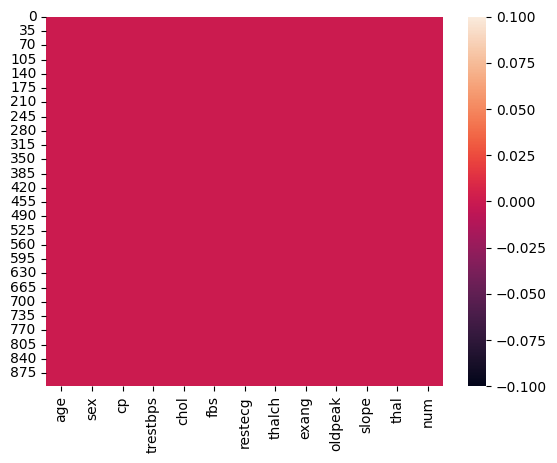

In [ ]:
sns.heatmap(df[df.columns].isnull())

In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.830396,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.079518,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.200000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    object 
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 99.2+ KB


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.0,downsloping,fixed defect,4


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.0,downsloping,fixed defect,4


In [ ]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.num.unique()

array([0, 1, 2, 3, 4])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.0,downsloping,fixed defect,4


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
903,62,1,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
904,56,1,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
905,56,1,non-anginal,144,208,True,st-t abnormality,105,TURE,0.0,downsloping,fixed defect,4


In [ ]:
dummies=pd.get_dummies(df,drop_first=True)
df=dummies.astype(int)

In [ ]:
df

,age,sex,trestbps,chol,thalch,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,150,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,41,1,135,203,132,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,57,1,140,192,148,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,52,1,118,186,190,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,57,1,110,201,126,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,125,0,120,1,4,0,0,0,0,1,0,0,0,0,0,1,0,1
903,62,1,166,170,120,3,4,0,0,0,0,0,1,1,0,0,1,0,0,1
904,56,1,170,0,123,2,4,0,1,0,0,0,0,1,0,0,0,0,1,0
905,56,1,144,208,105,0,4,0,1,0,1,0,1,0,0,1,0,0,0,0


In [ ]:
df.corr(method='pearson')

,age,sex,trestbps,chol,thalch,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
age,1.000000,0.051947,0.253709,-0.100059,-0.327868,0.177943,0.326227,-0.184421,-0.021998,0.036915,0.177004,-0.226296,0.133051,0.143235,0.083270,0.129919,0.074264,-0.079106,-0.039482,0.064602
sex,0.051947,1.000000,0.015988,-0.191632,-0.178484,0.085266,0.259258,-0.171612,-0.069576,0.005324,0.092480,-0.013596,0.070181,0.153642,0.056380,0.090777,0.021107,-0.043692,-0.166363,0.136545
trestbps,0.253709,0.015988,1.000000,0.117392,-0.132841,0.116267,0.136581,-0.046811,-0.004716,0.045422,0.112124,-0.118013,0.118234,0.092293,0.132185,0.152342,0.062625,-0.027265,-0.075990,0.081504
chol,-0.100059,-0.191632,0.117392,1.000000,0.198074,0.031282,-0.239065,0.146172,0.003334,0.013546,-0.113651,-0.027301,-0.138876,-0.040333,-0.002255,0.005907,-0.009949,0.040297,0.047378,-0.036892
thalch,-0.327868,-0.178484,-0.132841,0.198074,1.000000,-0.112419,-0.322632,0.220847,0.121594,0.080531,-0.065827,0.041575,-0.180856,-0.285331,-0.040380,-0.172625,-0.220563,0.281344,0.167220,-0.080547
oldpeak,0.177943,0.085266,0.116267,0.031282,-0.112419,1.000000,0.388147,-0.209350,-0.134328,0.010602,-0.002932,-0.068021,0.021449,0.401831,-0.084979,-0.139485,0.206695,-0.257191,-0.148056,0.129999
num,0.326227,0.259258,0.136581,-0.239065,-0.322632,0.388147,1.000000,-0.335455,-0.163444,-0.054802,0.156839,-0.165450,0.130134,0.344076,0.052852,0.052931,0.164815,-0.195553,-0.212488,0.205019
cp_atypical angina,-0.184421,-0.171612,-0.046811,0.146172,0.220847,-0.209350,-0.335455,1.000000,-0.252418,-0.107744,-0.075572,0.107236,-0.045921,-0.267048,-0.009109,-0.037315,-0.088077,0.077814,0.040253,-0.070272
cp_non-anginal,-0.021998,-0.069576,-0.004716,0.003334,0.121594,-0.134328,-0.163444,-0.252418,1.000000,-0.122302,-0.034208,0.006971,-0.044321,-0.196613,0.051226,0.040480,-0.121305,0.122043,0.097875,-0.065782
cp_typical angina,0.036915,0.005324,0.045422,0.013546,0.080531,0.010602,-0.054802,-0.107744,-0.122302,1.000000,0.022951,-0.060993,-0.010628,-0.122700,0.037487,0.005563,-0.004825,0.013134,0.050321,-0.064456


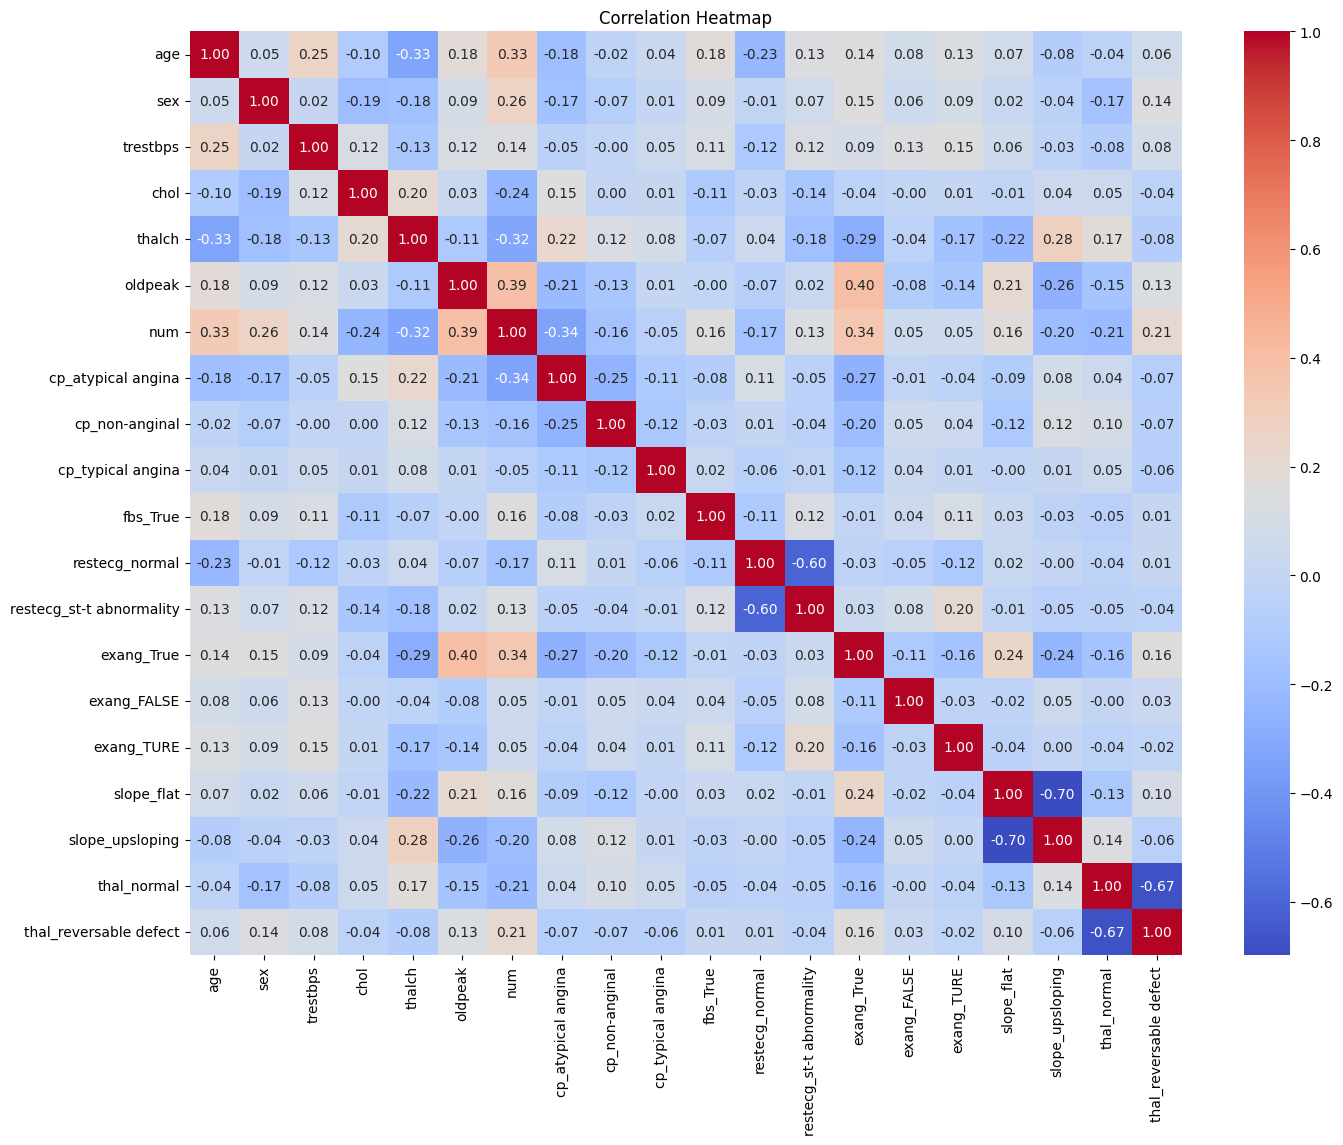

In [ ]:
corr =df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

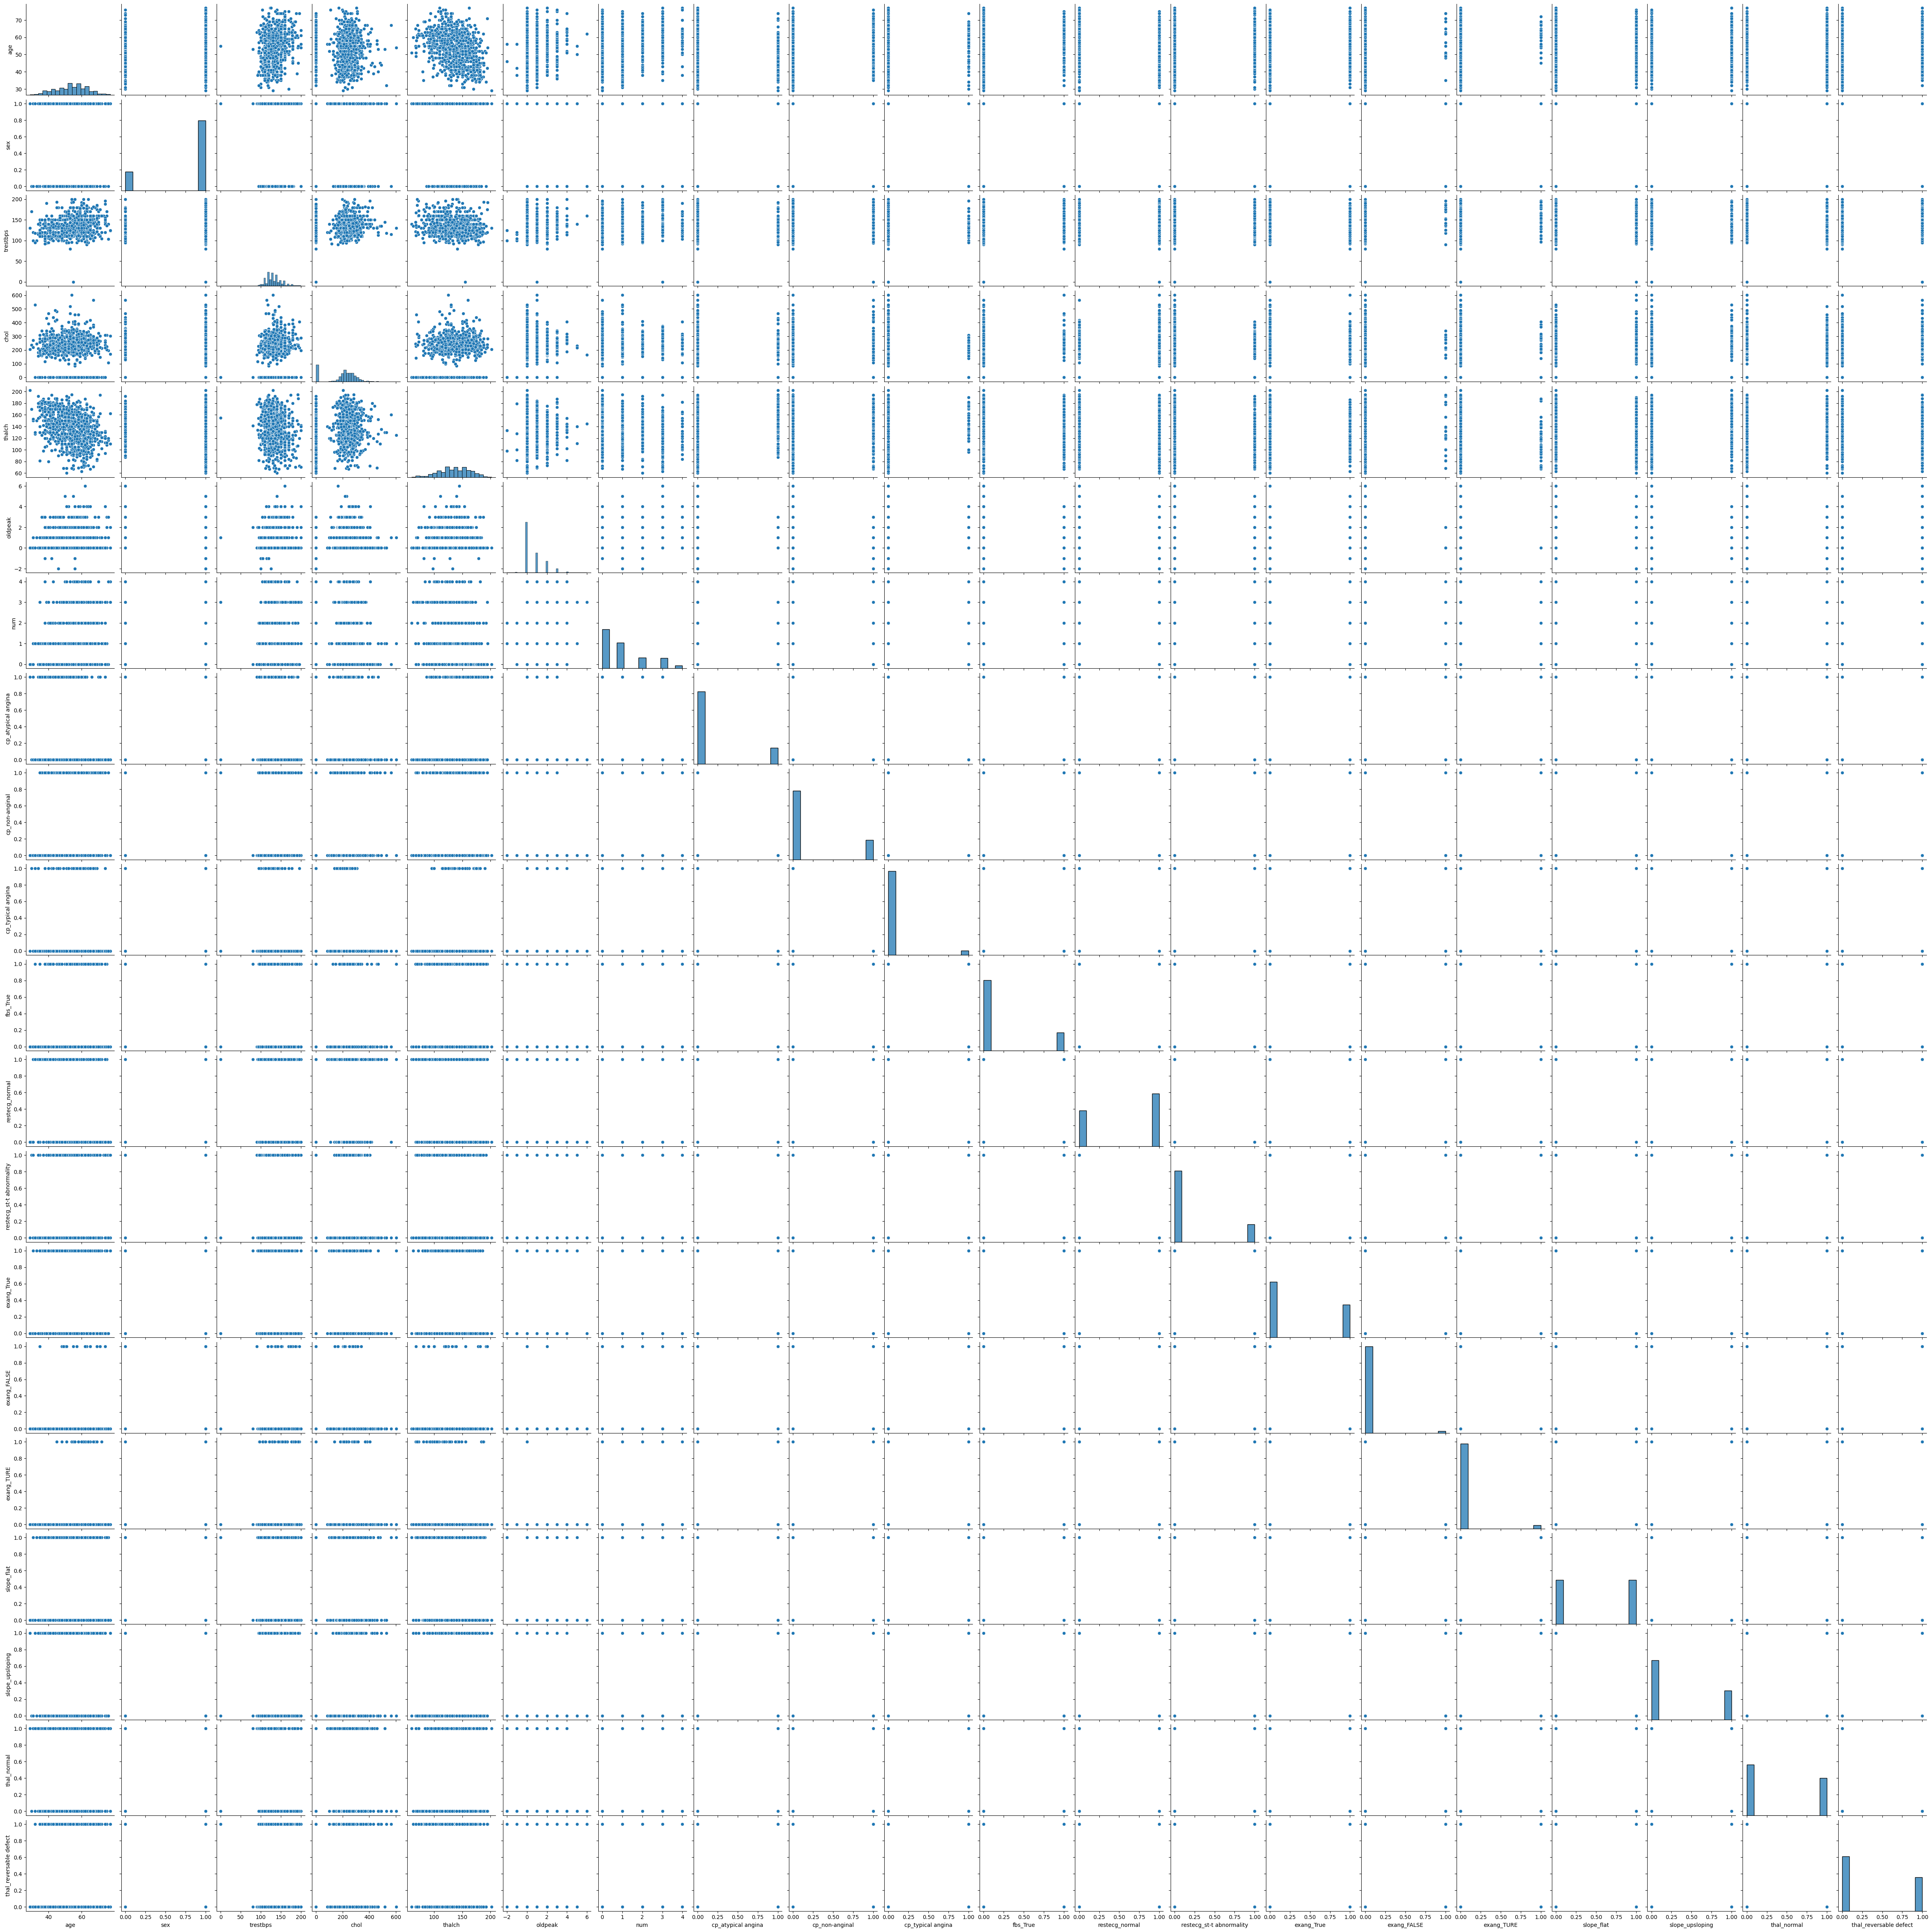

In [ ]:
sns.pairplot(df)

In [ ]:
X=df.drop("num",axis=1)
Y=df["num"]

In [ ]:
X

,age,sex,trestbps,chol,thalch,oldpeak,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,150,2,0,0,1,1,0,0,0,0,0,0,0,0,0
1,41,1,135,203,132,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,57,1,140,192,148,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,52,1,118,186,190,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,57,1,110,201,126,1,0,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,125,0,120,1,0,0,0,0,1,0,0,0,0,0,1,0,1
903,62,1,166,170,120,3,0,0,0,0,0,1,1,0,0,1,0,0,1
904,56,1,170,0,123,2,0,1,0,0,0,0,1,0,0,0,0,1,0
905,56,1,144,208,105,0,0,1,0,1,0,1,0,0,1,0,0,0,0


In [ ]:
Y

,num
0,0
1,0
2,0
3,0
4,0
...,...
902,4
903,4
904,4
905,4


In [ ]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(725, 19) (182, 19) (725,) (182,)


In [ ]:
x_train.head()

,age,sex,trestbps,chol,thalch,oldpeak,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
366,35,1,120,308,180,0,1,0,0,0,0,0,0,0,0,0,0,0,1
396,55,1,196,406,72,0,0,1,0,0,0,1,0,0,1,0,0,0,0
664,44,1,120,169,144,2,0,0,0,0,1,0,1,0,0,0,0,0,0
147,43,0,150,439,175,0,0,1,0,0,1,0,0,0,0,0,1,1,0
365,36,1,130,209,178,0,0,1,0,0,1,0,0,0,0,0,1,1,0


In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.46153846153846156

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71        82
           1       0.31      0.33      0.32        52
           2       0.17      0.18      0.17        17
           3       0.18      0.12      0.15        24
           4       0.20      0.14      0.17         7

    accuracy                           0.46       182
   macro avg       0.31      0.30      0.30       182
weighted avg       0.44      0.46      0.45       182



In [ ]:
# Define the hyperparameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],  # Criterion for splitting
    "max_depth": [5, 10, 15, 20],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Min samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Min samples in a leaf
    "max_features": ["sqrt", "log2"]  # Features to consider at each split
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy",  # Optimization metric
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and best accuracy score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best accuracy: 0.5517241379310345


In [ ]:
model1=DecisionTreeClassifier(criterion="entropy",max_depth=5,max_features="log2",min_samples_leaf=4,min_samples_split=5)
model1.fit(x_train,y_train)
y_preds=model1.predict(x_test)
model1.score(x_test,y_test)

0.532967032967033

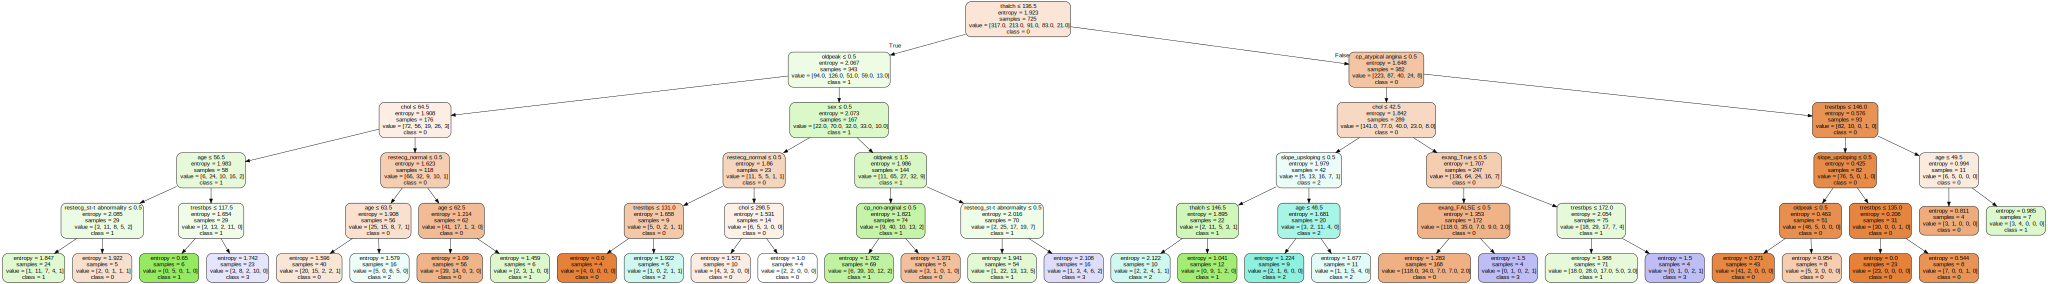

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


# Export the decision tree to a DOT format
dot_data = export_graphviz(model1, out_file=None,
                           feature_names=X.columns,
                           class_names=[str(x) for x in model1.classes_],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph
graph

**Specifics of Decision Tree Visualization:**
*   **Root Node:** The root node of the decision tree will likely contain the feature which the model deemed the most effective at initially splitting the data into heart disease and non-heart disease groups.
*   **Branches:** Subsequent branches of the tree will represent further refinement of splitting based on other features. The features chosen at each split aim to maximize the purity of each resulting branch.
*   **Leaf Nodes:** The leaf nodes represent the final predicted outcome of the decision tree - either heart disease (1) or no heart disease (0).

**Additional Notes:**
*   **Feature Interaction:** The decision tree inherently captures feature interactions (how the values of one feature influence how other features split the data).
*   **Overfitting:** Decision trees are prone to overfitting, and hyperparameter tuning is a crucial step. The specific hyperparameters used in the code (`max_depth`, `min_samples_leaf`, etc.) impact the tree complexity and depth, and they determine which features are used for splitting nodes. The values found by grid search suggest the model is likely generalized reasonably well and not overfitting to the training set.
*   **Data Specificity:** The identified important features are specific to the dataset and the context of predicting heart disease in that dataset. The feature importance of a similar model on a different dataset might be different.
*   **Bias:** Decision trees can also reflect bias in the training data and should be evaluated carefully in real world applications.

##2A)
##Label Encoding:

####Converts categorical values into integer codes (e.g., "red" → 0, "green" → 1, "blue" → 2).

####Use Case: Suitable when categorical values have an inherent order.

####Risk: Can introduce a false sense of hierarchy (ordinal relationship) between categories if there is none.

##One-hot Encoding:

####Converts each category into a new binary column (e.g., "color_red", "color_green", "color_blue").

####Use Case: Suitable when there is no ordinal relationship between categories.

####Risk: Can result in high-dimensional data if there are many categories (known as the "curse of dimensionality").

**Conclusion:**

This analysis provides a solid foundation for understanding the heart disease dataset and using a Decision Tree model for prediction. While the model achieves an accuracy of 60%, further improvements could be explored through other more complex models or ensemble techniques, feature engineering, or collection of more comprehensive dataset. This analysis highlights the importance of data preprocessing, careful exploratory data analysis and hyperparameter tuning in machine learning tasks.